In [2]:
import pandas as pd
import numpy as np

In [4]:
from IPython.display import Image

### 데이터 셀렉션 및 필터링

1. [ ]
    - 컬럼 기반 필터링 또는 불린 인덱싱 필터링 제공
2. ix[ ], loc[ ], iloc[ ]
    - 명칭/위치 기반 인덱싱을 제공
3. 불린 인덱싱(Boolean Indexing)
    - 조건식에 따른 필터링 제공

### ix, loc, iloc

- 명칭(Label) 기반 인덱싱은 컬럼의 명칭을 기반으로 위치를 지정하는 방식입니다. '컬럼 명' 같이 명칭으로 열 위치를 지정하는 방식입니다.
- 위치(Position) 기반 인덱싱은 0을 출발점으로 하는 가로축, 세로축, 좌표 기반의 행과 열 위치를 기반으로 데이터를 지정합니다. 따라서 행, 열 취값으로 정수가 입력됩니다.


- ix[] : 명칭 기반과 위치 기반 인덱싱을 함께 제공 (판다스에 기능이 삭제됨. ignore))
- loc[] : 명칭 기반 인덱싱
- iloc[] : 위치 기반 인덱싱

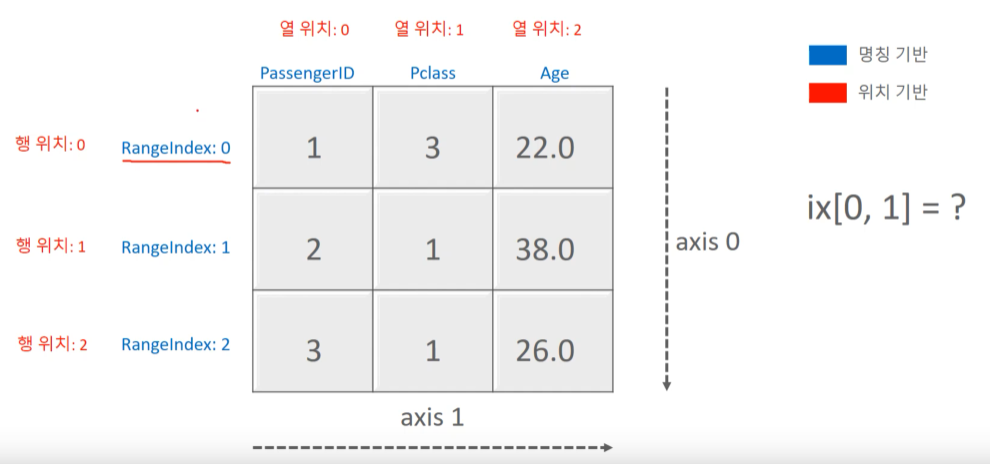

In [14]:
Image("picture1.png")

ix[0, 1] = 3 을 가리킴. 만약 행 위치:0, RangeIndex:1 이면 에러남 

### 불린 인덱싱(Boolean indexing)
위치기반, 명칭기반 인덱싱 모두 사용할 필요없이 조건식을 []안에 기입하면 간편하게 필터링을 수행 \
```titanic_boolean = titanic_df[titanic_df['Age']>60]```

## Code

### 데이터 Selection 및 Filtering

**DataFrame의 [] 연산자** \
넘파이에서 [] 연산자는 행의 위치, 열의 위치, 슬라이싱 범위 등을 지정해 데이터를 가져올 수 있었습니다. 하지만 DataFrame 바로 뒤에 있는 [] 안에 들어갈 수 있는 것은 컬럼 명 문자(또는 컬럼 명의 리스트 객체), 또는 인덱스로 변환 가능한 표현식입니다.(슬라이싱, 불린 인덱싱)

In [15]:
titanic_df = pd.read_csv('train.csv')
print('단일 컬럼 데이터 추출 : \n', titanic_df['Pclass'].head(3))
print('\n여러 컬럼들의 데이터 추출 :\n :', titanic_df[['Survived', 'Pclass']].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생 :\n', titanic_df[0])

단일 컬럼 데이터 추출 : 
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출 :
 :    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

앞에서 DataFrame의 [ ] 내에 숫자 값을 입력할 경우 오류가 발생한다고 했는데, Pandas의 index 형태로 변환가능한 표현식은 [ ] 내에 입력할 수 있습니다. \
가령 titanic_df의 처음 2개 데이터를 추출하고자 titanic_df[0:2]와 같은 슬라이싱을 이용하였다면 정확히 원하는 결과를 반환해 줍니다.

In [16]:
titanic_df[0:2] # 대도록이면 슬라이싱은 쓰지말자.  (컬럼명과 불린인덱스만 쓰도록 하자, 에러위험 감소함)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


[ ] 내에 조건식을 입력하여 불린 인덱싱을 수행할 수 있습니다. (DataFrame 바로 뒤에 있는 []안에 들어갈 수 있는 것은 컬럼명과 불린인덱싱으로 범위를 좁혀서 코딩을 하는게 도움이 됩니다.)

In [17]:
titanic_df[titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


**DataFrame ix[] 연산자** \
더 이상 기능 지원을 하지 않음 ignore \
명칭 기반과 위치 기반 인덱싱 모두를 제공

In [18]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
# print('컬럼 위치 기반 인덱싱 데이터 추출 :', titanic_df.ix[0,2])
# print('컬럼명 기반 인덱싱 데이터 추출 :', titanic_df.ix[0,'Pclass'])
# 'DataFrame' object has no attribute 'ix'
# 판다스에서 더이상 ix를 지원하지 않음

**DataFrame iloc[] 연산자** \
위치기반 인덱싱을 제공합니다.


In [22]:
data = {'Name' : ['Chuimin', 'Eunkyung', 'Jinwoong', 'Soobeom'],
        'Year' : [2011, 2016, 2015, 2015],
        'Gender' : ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one', 'two', 'three', 'four'])
data_df

,Name,Year,Gender
one,Chuimin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [26]:
# data_df를 reset_index() 로 새로운 숫자형 인덱스를 생성
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

# index 값에 1을 더해서 1부터 시작하는 새로운 index값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chuimin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [27]:
data_df.head()

,Name,Year,Gender
one,Chuimin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [32]:
data_df.iloc[0,0] #숫자만 들어간다.

'Chuimin'

In [34]:
# 아래 코드는 오류를 발생시킵니다.
data_df.iloc[0, 'Name']

In [36]:
# 아래 코드는 오류를 발생시킵니다.
data_df.iloc['one', 0]

In [37]:
data_df_reset.head()

,old_index,Name,Year,Gender
1,one,Chuimin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [38]:
data_df_reset.iloc[0,1]

'Chuimin'

**DataFrame loc[] 연산자** \
명칭기반 인덱싱을 제공합니다.

In [39]:
data_df.loc['one', 'Name']

'Chuimin'

In [40]:
data_df_reset.loc[1, 'Name']

'Chuimin'

In [42]:
# 아래 코드는 오류를 발생시킵니다.
data_df_reset.loc[0, 'Name']

In [47]:
print('위치기반 iloc slicing \n', data_df.iloc[0:1,0], '\n') # iloc 슬라이싱 : 끝값이 포함되지 않는다.
print('명칭기반 loc slicing \n', data_df.loc['one':'two', 'Name']) # loc 슬라이싱 : 끝값이 포함된다.

위치기반 iloc slicing 
 one    Chuimin
Name: Name, dtype: object 

명칭기반 loc slicing 
 one     Chuimin
two    Eunkyung
Name: Name, dtype: object


In [50]:
print(data_df_reset.loc[1:2, 'Name'])
print(data_df_reset.iloc[0:2, 1])

1     Chuimin
2    Eunkyung
Name: Name, dtype: object
1     Chuimin
2    Eunkyung
Name: Name, dtype: object


**불린 인덱싱(Boolean indexing)** \
헷갈리는 위치기반, 명칭기반 인덱싱을 사용할 필요없이 조건식을 []안에 기입하여 간편하게 필터링을 수행

In [53]:
titanic_df = pd.read_csv('train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [54]:
titanic_df['Age'] > 60

# var1 = titanic_df['Age'] > 60
# print(type(var1))

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [57]:
titanic_df[titanic_df['Age'] > 60][['Name', 'Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [58]:
titanic_df[['Name', 'Age']][titanic_df['Age'] > 60].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [61]:
titanic_df.loc[titanic_df['Age'] >60, ['Name', 'Age']].head(3) # .loc[행 인덱스, 열 name]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


논리 연산자로 결합된 조건식도 불린 인덱싱으로 적용 가능합니다.

In [62]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


조건식을 변수로도 할당 가능합니다. 복잡한 조건신은 변수로 할당하여 가독성을 향상 시킬 수 있습니다.

In [63]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass'] == 1
cond3 = titanic_df['Sex'] == 'female'
titanic_df[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [64]:
titanic_df.shape

(891, 12)

### Aggregation 함수
- sum(), max(), min(), count() 등의 함수는 DataFrame/Series에서 집합 (Aggregation)연산을 수행.
- DataFrame의 경우 DataFrame에서 바로 aggregation을 호출할 경우 모든 컬럼에 해당 aggregation을 적용

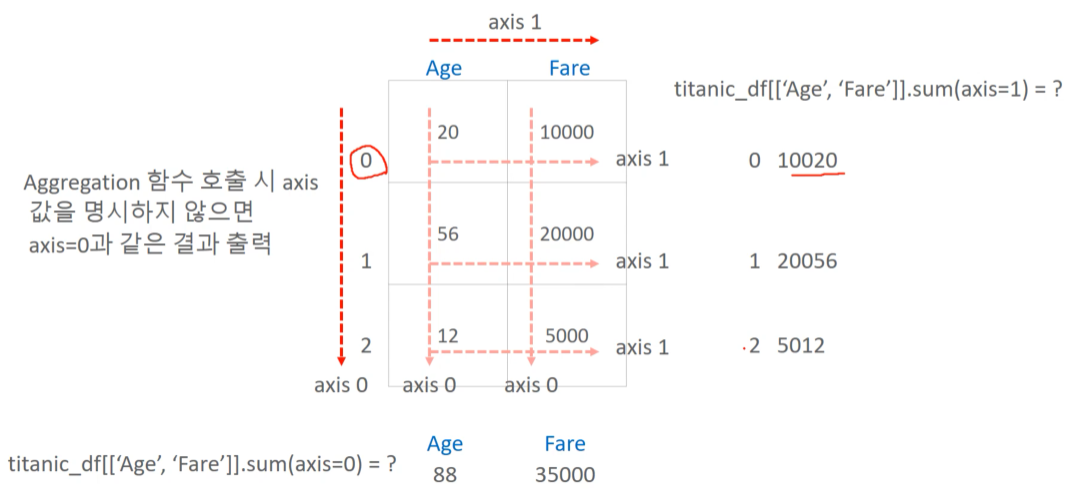

In [68]:
Image("picture2.png")

In [69]:
## NaN 값은 count에서 제외
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

특정 컬럼들로 Aggregation 함수 수행

In [79]:
titanic_df[['Age', 'Fare']].mean() # default : axis=0

Age     29.699118
Fare    32.204208
dtype: float64

In [78]:
titanic_df[['Age', 'Fare']].sum()

Age     21205.1700
Fare    28693.9493
dtype: float64

In [73]:
titanic_df[['Age', 'Fare']].count()

Age     714
Fare    891
dtype: int64

### DataFrame Group By
- DataFrame은 Group by 연산을 위해 groupby() 메서드를 제공
- groupby() 메서드는 by 인자로 group by 하려는 컬럼명을 입력 받으면 DataFrameGroupBy 객체를 반환
- 이렇게 반환된 DataFrameGroupBy 객체에 aggregation 함수를 수행.

**groupby()** by 인자에 Group By 하고자 하는 컬럼을 입력, 여러개의 컬럼으로 Group by 하고자 하면 [] 내에 해당 컬럼명을 입력. \
DataFrame에 groupby()를 호출하면 DataFrameGroupBy 객체를 반환

In [82]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))
print(titanic_groupby)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


DataFrameGroupBy 객체에 Aggregation 함수를 호출하여 Group by 수행.

In [83]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [84]:
print(type(titanic_groupby))
print(titanic_groupby.shape)
print(titanic_groupby.index)

<class 'pandas.core.frame.DataFrame'>
(3, 11)
Int64Index([1, 2, 3], dtype='int64', name='Pclass')


In [86]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [90]:
titanic_df[['Pclass', 'PassengerId', 'Survived']].groupby('Pclass').count()

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [93]:
print(titanic_df.groupby('Pclass')['Pclass'].count())
print(titanic_df['Pclass'].value_counts())

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


**RDBMS의 group by는 select 절에 여러개의 aggregation 함수를 적용할 수 있음. \
Select max(Age), min(Age) from titanic_table group by Pclass \
판다스는 여러개의 aggregation 함수를 적용할 수 있도록 agg() 함수를 별도로 제공**

In [94]:
titanic_df.groupby('Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


딕셔너리를 이용하여 다양한 aggregation 함수를 적용

In [96]:
agg_format={'Age': 'max', 'SibSp' :'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


### 결손 데이터(Missing Data) 처리하기

- isna() : DataFrame의 isna() 메서드는 주어진 컬럼값들이 NaN인지 True/False 값을 반환합니다. (NaN이면 True)
- fillna() : Missing 데이터를 인자로 주어진 값으로 대체합니다.

### MIssing 데이터 처리하기

**DataFrame의 isna() 메서드는 모든 컬럼값들이 NaN인지 True/False값을 반환합니다. (NaN이면 True)**

In [97]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


아래와 같이 isna() 반환 결과에 sum()을 호출하여 컬럼별로 NaN 건수를 구할 수 있습니다.

In [99]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**fillna()로 Missing 데이터 대체하기**

In [101]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [102]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공

- 판다스는 apply 함수에 lambda 식을 결합해 DataFrame이나 Series의 레코드별로 데이터를 가공하는 기능을 제공합니다.
- 판다스의 경우 컬럼에 일괄적으로 데이터 가공을 하는 것이 속도 면에서 더 빠르나 복잡한 데이터 가공이 필요할 경우 어쩔 수없이 apply lambda를 이용합니다.
- 예) titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))

파이썬 lambda 식 기본 : lambda x : x**2

In [103]:
def get_square(a) :
    return a**2

print('3의 제곱은 :', get_square(3))

3의 제곱은 : 9


In [104]:
lambda_square = lambda x : x ** 2
print('3의 제곱은 :', lambda_square(3))

3의 제곱은 : 9


In [106]:
a = [1,2,3]
squares = map(lambda x : x**2, a) # 입력값이 여러개가 들어오면 이렇게 표현한다
list(squares)

[1, 4, 9]

### 판다스에서 apply lambda 식 적용

In [108]:
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name', 'Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [109]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age', 'Child_Adult']].head(10)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child
8,27.000000,Adult
9,14.000000,Child


In [110]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else ('Adult' if x <= 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [111]:
# elif가 많아지면 함수를 그냥 하나 만들고 람다식에 넣자
# return 필수
def get_category(age) :
    cat = ' '
    if age <= 5 :
        cat = 'Baby'
    elif age <= 12 :
        cat = 'Child'
    elif age <= 18 :
        cat = 'Teenager'
    elif age <= 25 :
        cat = 'Student'
    elif age <= 35 :
        cat = 'Young Adult'
    elif age <= 60 :
        cat = 'Adult'
    else :
        cat = 'Elderly'
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()
    

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


# 판다스 Summary
- 2차원 데이터 핸들링을 위해서는 판다스를 사용하십시오.
- 판다스는 매우 편리하고 다양한 데이터 처리 API를 제공하지만 (조인, 피벗/언피벗, SQL like API 등), 이를 다 알기에는 많은 시간과 노력이 필요합니다.
- 지금까지 언급된 핵심 사항을 집중하고, 데이터 처리를 직접 수행해 보면서 문제에 부딛칠 때마다 판다스의 다양한 API를 찾아서 해결해 가면 판다스에 대한 실력을 더욱 향상 시킬 수 있을 것입니다.